#**Projeto Integrador - 1º Trimestre**
#Programa Avançado em Data Science e Decisão - Insper
###Ilana García, Izabelle Silva, Julia Borges, Lívia Bertoni




**Escopo desta seção:**  
1) Carregar dados (Pandas/Numpy)  
2) Analisar *missing values* (tabela + `missingno`)  
3) Remover colunas com muitos ausentes  
4) Remover registros do ano de **2016**  
5) Realizar análises descritivas iniciais (tabelas e gráficos)


O objetivo desta seção é preparar e documentar o *dataset* para etapas seguintes de modelagem preditiva.

> Observação: a modelagem preditiva será feita em **R**

##  1. Importação e leitura dos dados



Fizemos a importação das bibliotecas que serão utilizadas ao longo desta análise

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Leitura dos dados

Carregamos a base **cs_bisnode_panel.csv** (painel 2005–2016) diretamente de um repositório público no GitHub.

In [ ]:
# Importando Base de dados
df = pd.read_csv("https://github.com/silvaizabelle/projeto_integrador_1tri/blob/main/cs_bisnode_panel.csv?raw=true")

A seguir, visualizamos as primeiras linhas da base de forma transposta, buscando facilitar a leitura das variáveis.

In [ ]:
# Visualizar as primeiras linhas
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
comp_id,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001034.0,1001541.0,1001541.0,1001541.0,1001541.0,1001541.0,1001541.0,1001541.0,1002029.0,1002029.0
begin,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2007-01-01,2008-01-01
end,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2007-12-31,2008-12-31
COGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
amort,692.59259,603.703674,425.925934,300.0,207.40741,177.777771,155.555557,140.740738,140.740738,29.629629,3.703704,0.0,0.0,0.0,481.481476,2292.592529,2292.592529,2292.592529,11570.370117,13462.962891
curr_assets,7266.666504,13122.222656,8196.295898,8485.185547,5137.037109,2096.296387,3607.407471,148.148148,140.740738,144.444443,140.740738,2040.740723,1740.740723,127403.703125,9629.629883,4811.111328,6500.0,8729.629883,138237.03125,302511.125
curr_liab,7574.074219,12211.111328,7800.0,7781.481445,15300.0,19629.628906,22555.554688,21429.628906,21851.851562,22340.740234,22888.888672,933.333313,844.444458,127325.929688,1303.703735,925.925903,296.296295,0.0,132603.703125,323096.28125
extra_exp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extra_inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.074074,0.0,0.0,0.0,0.0
extra_profit_loss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.074074,0.0,0.0,0.0,0.0


### 1.2. Verificação de colunas categóricas

Vamos explorar algumas colunas para entender a distribuição de categorias e possíveis codificações:
- `balsheet_flag`
- `gender`
- `nace_main`
- `balsheet_length`

No caso da variável `balsheet_flag` vemos que ela é uma dummy com valores 1 e 0


In [ ]:
df['balsheet_flag'].value_counts()

,count
balsheet_flag,
0,283993
1,3836


Na variável `gender` vemos que ela é uma variável categórica onde temos explicitamente qual a categoria da observação (gênero feminino, masculino ou um mix dos dois).

In [ ]:
df['gender'].value_counts()

,count
gender,
male,160553
female,47623
mix,23226


Já quando falamos da variável `nace_main` observamos uma variável categórica, mas as categorias estão representadas como números. Isso faz com que tenhamos que ter atenção na tratativa dos dados e criação de modelos, para que ela seja tratada como categórica e não numérica.


In [ ]:
df['nace_main'].value_counts()

,count
nace_main,
5610.0,112238
5630.0,41771
5510.0,19354
3312.0,10431
5629.0,10426
...,...
1085.0,2
8412.0,1
9321.0,1


Agora para a variável `balsheet_flag` ela de fato é uma variável numérica que representa a quantidade de dias em que aquele balanço foi analisado.

In [ ]:
df['balsheet_length'].value_counts()

,count
balsheet_length,
364,202188
365,56790
274,484
91,440
30,390
...,...
169,23
133,21
6,20


Essas variações de comportamento fazem com que tenhamos que analisar cada variável individualmente e entender como devemos lidar com suas características no momento de análise da base.

### 1.3. Compreendendo os balanços parciais

Uma das primeiras variáveis analisadas foi a `balsheet_notfullyear`, que indica se o balanço refere-se a um ano incompleto.  

Entendemos que seria importante analisar essa variável para verificar se as empresas teriam mais de um balanço no mesmo ano (sendo alguns deles parciais) ou se seriam apenas balanços referentes aos anos de abertura/fechamento da empresa.

#### 1.3.1 Frequência de balanços parciais por ano

Para isso verificamos inicialmente quantos balanços parciais existem em cada ano.

E vimos que a proporção entre balanços parciais e de ano inteiro se mantinha razoavelmente estável ao longo dos anos.


In [ ]:
# verificar por ano quantos balanços são de ano completo ou parcial
df.groupby('year')['balsheet_notfullyear'].value_counts()

year  balsheet_notfullyear
2005  0                       17641
      1                        1506
2006  0                       18866
      1                        1334
2007  0                       19929
      1                        1875
2008  0                       21600
      1                        2133
2009  0                       22483
      1                        3113
2010  0                       23251
      1                        3533
2011  0                       23981
      1                        4241
2012  0                       25476
      1                        2993
2013  0                       25486
      1                        2988
2014  0                       25401
      1                        2750
2015  0                       25124
      1                        2382
2016  0                        9740
      1                           3
Name: count, dtype: int64

#### 1.3.2 Investigação de balanços incompletos

Isso nos levou a investigar se os balanços parciais (`balsheet_notfullyear = 1`) ocorrem devido à abertura recente ou encerramento da empresa.

Para isso comparamos a data de vigência do balanço (`begin`e `end`), as datas de abertura (`founded_date`) e a data de fechamento (`exit_date`) das empresas.

E vimos que nos anos onde os balanços são parciais, de fato temos o ano de abertura ou de fechamento da empresa.


In [ ]:
# verificando se os balanços que não possuem um ano completo, acontecem por a empresa ter menos de um ano de existência ou porque a empresa já foi fechada.
df[df['balsheet_notfullyear'] == 1].T


,43,44,45,46,101,106,118,119,132,133,...,287692,287697,287703,287733,287737,287756,287761,287769,287770,287794
comp_id,1004012.0,1004898.0,1007261.0,1007261.0,1035705.0,1039649.0,1056952.0,1056952.0,1062139.0,1070690.0,...,463690432512.0,463727525888.0,463741026304.0,463829172224.0,463840575488.0,463873867776.0,463885369344.0,463926460416.0,463937011712.0,464044589056.0
begin,2013-01-14,2015-05-22,2009-09-08,2010-09-08,2011-10-26,2015-06-15,2006-02-22,2007-02-22,2010-01-01,2010-11-03,...,2011-04-11,2011-09-06,2014-05-22,2012-07-05,2008-08-15,2011-07-01,2009-03-04,2014-06-05,2010-12-23,2008-11-20
end,2013-05-15,2015-12-31,2009-12-31,2010-12-31,2011-12-31,2015-12-31,2006-12-31,2007-12-31,2010-06-16,2010-12-31,...,2011-12-31,2011-12-31,2014-12-31,2012-12-31,2008-12-31,2011-12-31,2009-12-31,2014-12-31,2010-12-31,2008-12-31
COGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
amort,0.0,2214.814697,NaN,0.0,296.296295,0.0,0.0,1070.370361,51362.964844,0.0,...,0.0,NaN,207.40741,37.037037,370.370361,0.0,0.0,407.40741,0.0,0.0
curr_assets,1496.296265,16325.925781,1851.851807,2459.259277,9007.407227,5755.555664,10592.592773,5922.222168,1959.259277,6522.222168,...,1944.444458,11111.111328,11851.851562,1537.036987,3029.629639,5974.074219,18870.371094,33837.035156,1722.222168,479170.375
curr_liab,7.407407,5892.592773,0.0,1348.148193,588.888916,37.037037,0.0,7007.407227,218018.515625,600.0,...,418.518524,0.0,5377.777832,3788.888916,4833.333496,492.59259,11788.888672,27674.074219,0.0,3762.962891
extra_exp,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extra_inc,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
extra_profit_loss,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.3.3 Empresas com mais de um balanço por ano

Para confirmar a hipótese levantada acima, verificamos se há empresas que registraram múltiplos balanços no mesmo ano.  
Isso pode indicar duplicidade ou balanços parciais + completos.

Porém, vimos que todas as empresas possuem apenas um balanço por ano.

In [ ]:
# conferindo se as empresas disponibilizam apenas um balanço por ano ou se podem lançar balanço anual e algum balanço parcial
df_counts = (
    df.groupby(['comp_id', 'year'])['balsheet_notfullyear']
      .count()
      .reset_index(name='count')
)

# Filtrar apenas os que têm mais de 1
df_filtrado = df_counts[df_counts['count'] > 1]


#### **Resultado**: nenhuma empresa com mais de um balanço por ano

O dataframe resultante está vazio, portanto, não há casos de empresas com múltiplos registros de balanço por ano.

Isso confirma que de fato os balanços parciais representam o ano de abertura/fechamento da empresa. E por isso, em nossa análise, vamos considerar que todos os balanços são referentes ao ano fechado da empresa.

In [ ]:
df_filtrado

,comp_id,year,count


### 1.4. Análise de missing values
Antes de remover colunas, avaliamos percentuais de observações ausentes por variável e visualizamos padrões com `missingno`.


Essas visualizações e tabelas ajudam a ver:
- Onde estão as maiores concentrações de *missing*;  
- O percentual de valores ausentes por coluna.  

#### 1.4.1 Visualização de Missing Values

A seguir, usamos as ferramentas `missingno` e `.isna()` do Pandas para inspecionar:

- A distribuição visual dos dados ausentes (via `matrix` e `heatmap`);
- As variáveis com maior percentual de ausentes (top 10).

Isso nos ajuda a embasar a exclusão de colunas com alta ausência de dados.


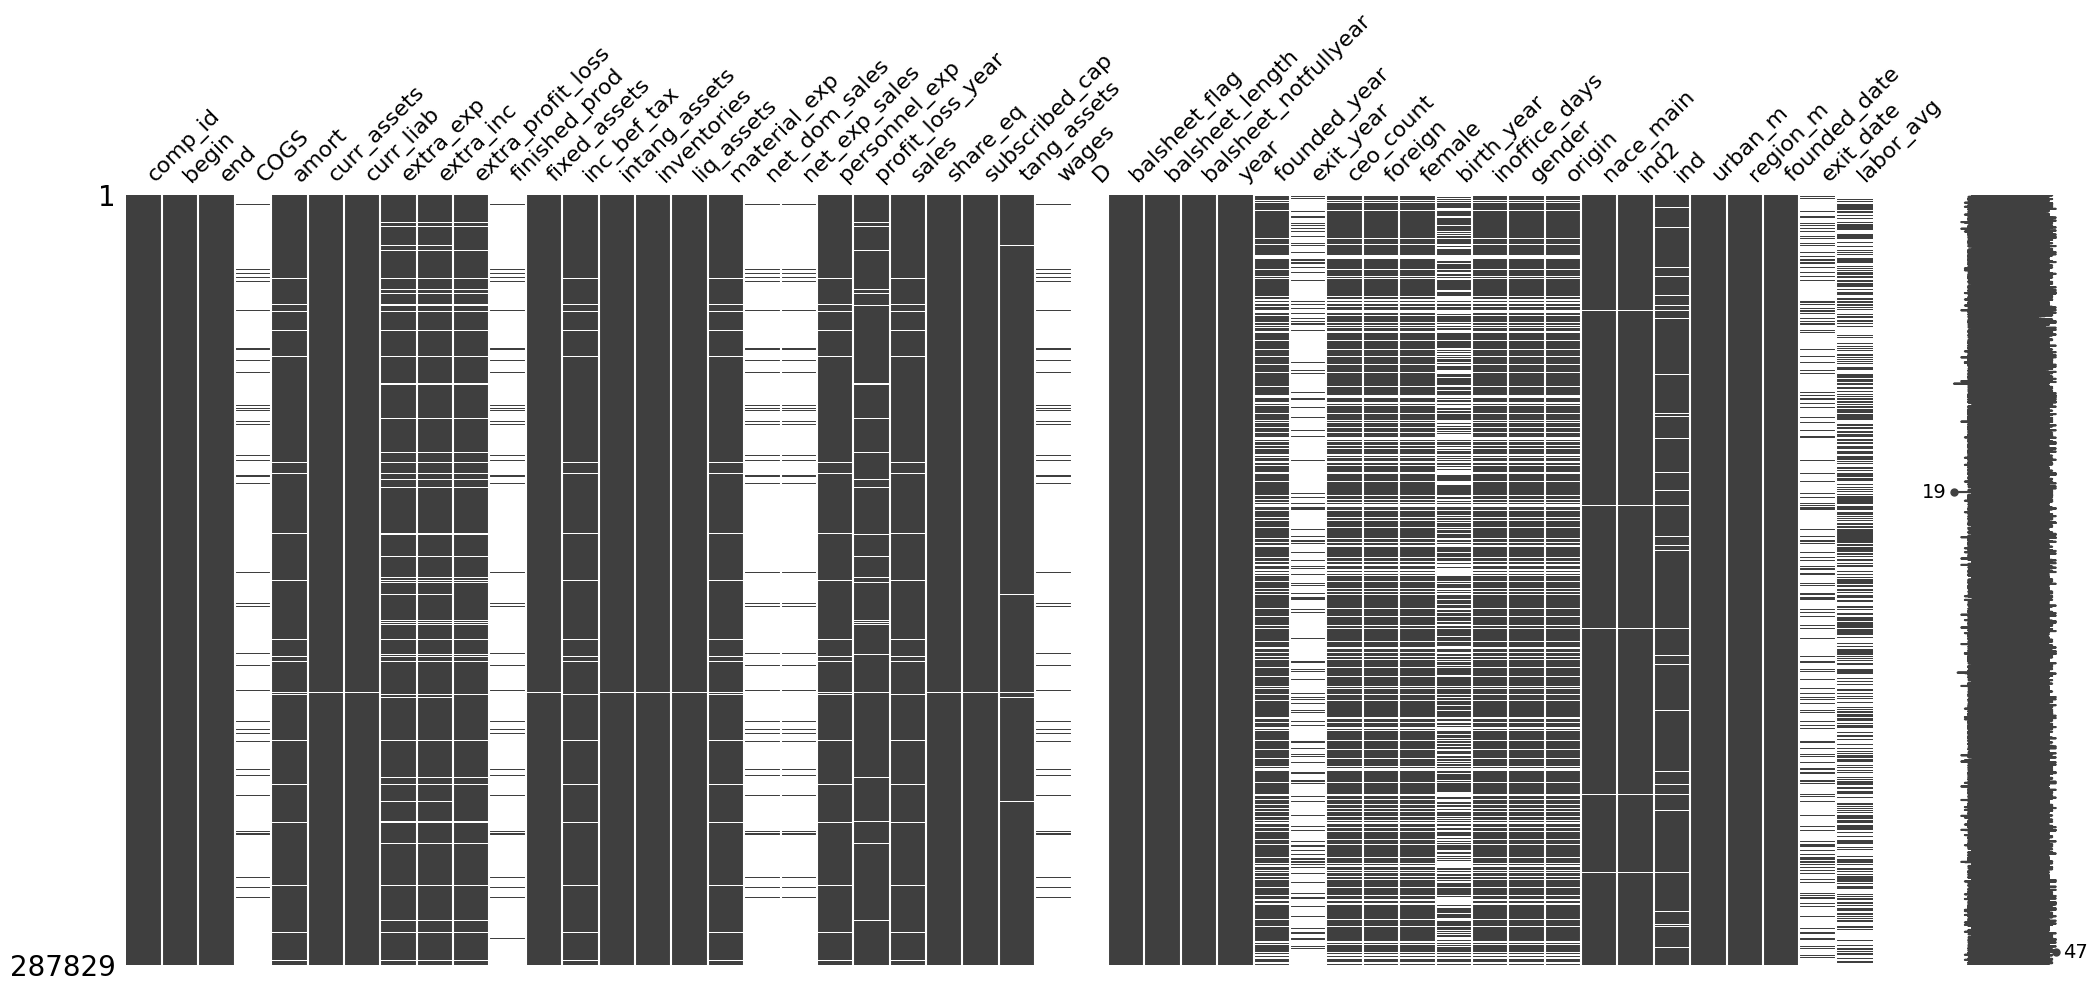

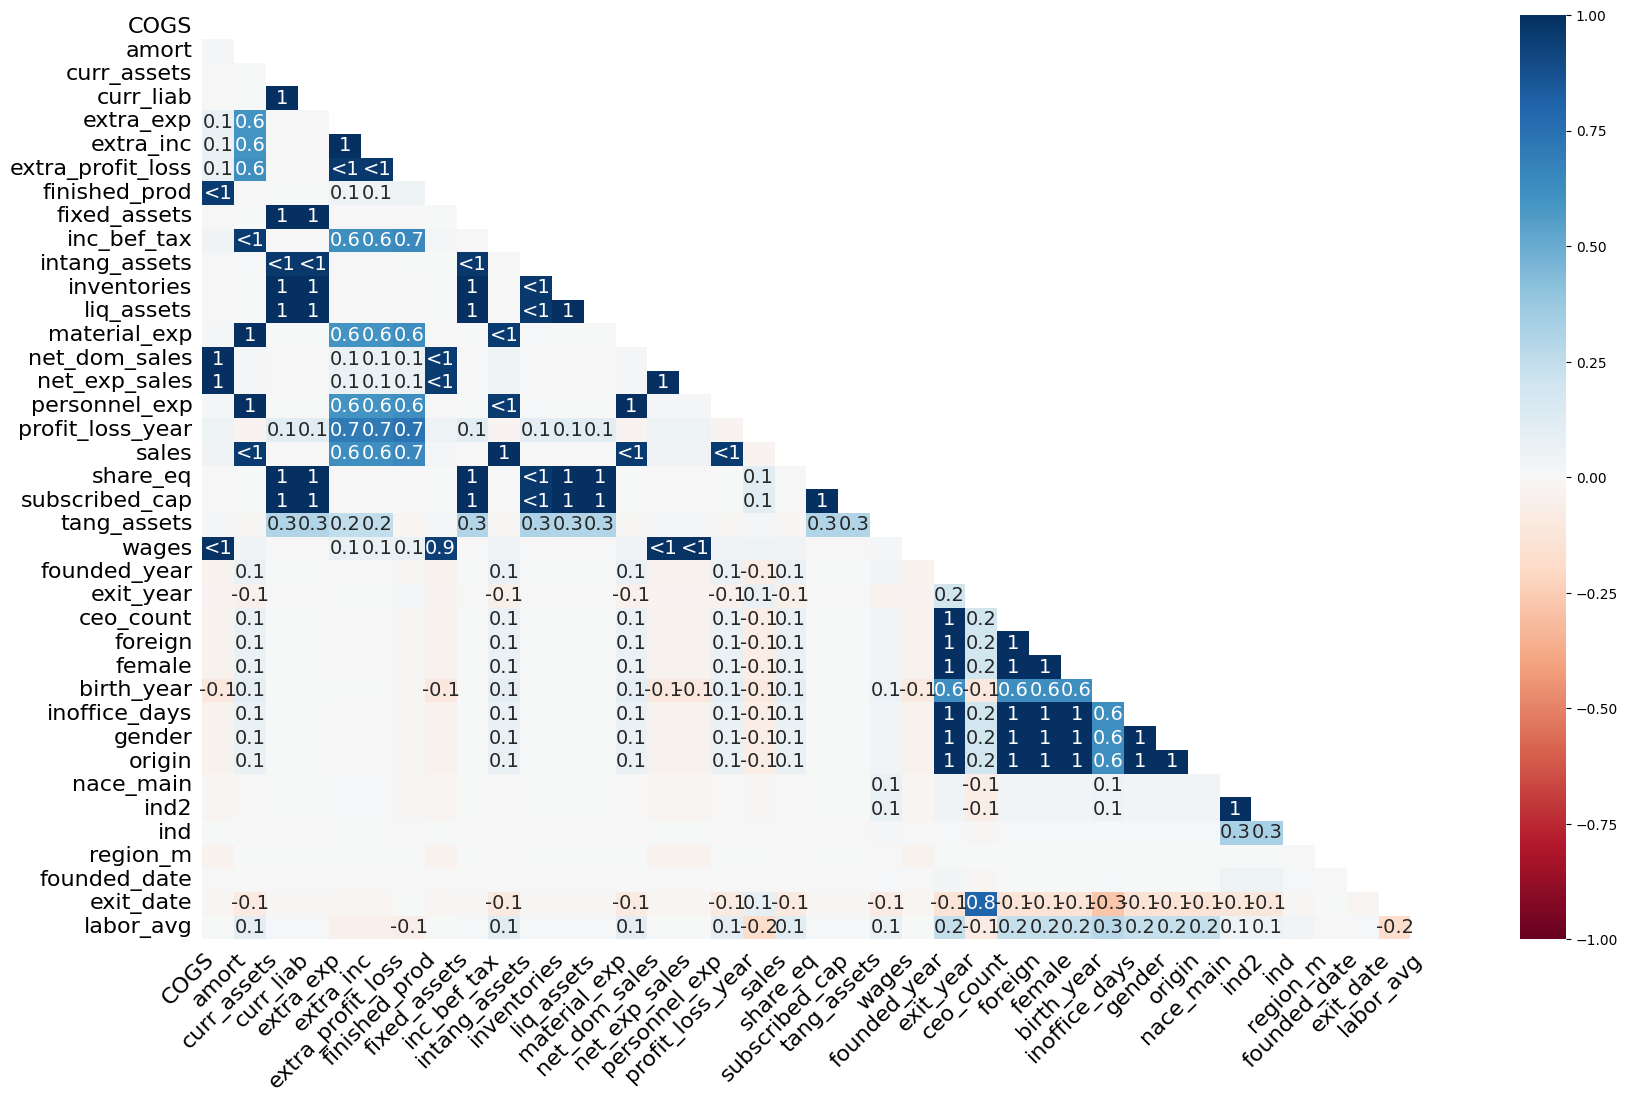

,0
D,100.000000
finished_prod,93.925213
wages,93.752193
COGS,93.656998
net_exp_sales,93.656998
net_dom_sales,93.656998
exit_year,86.499276
exit_date,80.481466
labor_avg,50.909394
birth_year,38.848761


In [ ]:
# Visualização geral dos missing values

msno.matrix(df); plt.show()
msno.heatmap(df); plt.show()


# Percentual de missing por coluna
(df.isna().mean() * 100).sort_values(ascending=False).head(10)

#### 1.4.2 Remoção de colunas indicadas inicialmente
Com base na análise anterior, algumas colunas têm percentuais muito altos de valores ausentes.

Removemos inicialmente as colunas indicadas no próprio enunciado do projeto:

[`COGS`, `finished_prod`, `net_dom_sales`, `net_exp_sales`, `wages`, `D`]

Essas colunas têm altos níveis de ausentes e **não são essenciais para nosso objetivo preditivo** (prever falência em até dois anos).

Usamos a opção `errors='ignore'` porque isso garante que, caso alguma dessas colunas não exista na base, o código não quebre.
Depois mostramos as primeiras linhas com `df.head()` para validar visualmente que a base continuava consistente.

In [ ]:
print("Shape inicial:", df.shape)

cols_enunciado = ['COGS','finished_prod','net_dom_sales','net_exp_sales','wages','D']
cols_presentes = [c for c in cols_enunciado if c in df.columns]
print("Colunas (presentes) a remover:", cols_presentes)

df = df.drop(columns=cols_enunciado, errors='ignore')
print("Shape após remoção:", df.shape)


Shape inicial: (287829, 48)
Colunas (presentes) a remover: ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D']
Shape após remoção: (287829, 42)


#### 1.4.3 Remoção de colunas adicionais

Com base na nossa avaliação dos *missing values* e da utilidade das variáveis, decidimos também excluir outras colunas além das que já estavam no enunciado.  

Optamos por excluir colunas com alta proporção de valores ausentes, baixa variabilidade ou pouca relevância para a etapa atual.

As principais razões para exclusão foram:
- Alta ausência de dados, dificultando a análise (ex.: `subscribed_cap`);

 - Pouca variabilidade ou baixo valor informativo, como flags (`balsheet_flag`, `balsheet_notfullyear`);

- Risco de vazamento de informação, como `exit_year` (que antecipa o fechamento da empresa);

- Redundância, como `founded_year` (já temos `founded_date`, usada para calcular a idade e está com informações mais completas).


A ideia foi simplificar a base, mantendo apenas variáveis que de fato podem contribuir para a análise.

In [ ]:
# Colunas adicionais a remover:
# - begin/end: metadados de janela/período (alta ausência, pouco informativas nesta etapa)
# - subscribed_cap: capital subscrito (muitos NAs)
# - balsheet_flag / balsheet_notfullyear: flags de completude/ano parcial (pouca variabilidade; ruído)
# - founded_year: redundante se mantivermos founded_date (idade será criada depois)
# - exit_year: ligado a fechamento; pode vazar informação do alvo
extra_drop = [
    'begin', 'end', 'subscribed_cap',
    'balsheet_flag', 'balsheet_notfullyear',
    'founded_year', 'exit_year'
]

# Diagnóstico visível: %missing e nº de valores distintos
existentes = [c for c in extra_drop if c in df.columns]
if existentes:
    diag = pd.DataFrame({
        'missing_%': (df[existentes].isna().mean()*100).round(2),
        'nunique': df[existentes].nunique(dropna=True)
    }).sort_values(['missing_%','nunique'], ascending=[False, True])
    print(diag)

else:
    print("Nenhuma das colunas adicionais está presente na base.")

# Drop seguro (não quebra se alguma não existir)
df = df.drop(columns=extra_drop, errors='ignore')
print("Shape após remover colunas adicionais:", df.shape)


                      missing_%  nunique
exit_year                 86.50       18
founded_year              19.61       38
subscribed_cap             0.05     3745
balsheet_flag              0.00        2
balsheet_notfullyear       0.00        2
end                        0.00     1738
begin                      0.00     3411
Shape após remover colunas adicionais: (287829, 35)


#### 1.4.4 Ajustes pontuais de NAs (moda e média)
Para estabilizar a base com as variáveis mantidas aplicamos um preenchimento simples, de acordo com as características de cada:

- **Moda** → variáveis de contagem/categóricas (`ceo_count`, `gender`, `origin`)
- **Média** → variáveis proporcionais/contínuas (`foreign`, `female`, `inoffice_days`, `birth_year`)

(sem transformar distribuição; apenas para estabilizar a base desta etapa).

In [ ]:
# Listas de variáveis para ajuste
fill_mode = ['ceo_count', 'gender', 'origin']                         # categóricas/contagem → moda
fill_mean = ['foreign', 'female', 'birth_year', 'inoffice_days']      # proporções/contínuas → média

# 1) Moda (categóricas/contagem)
for col in fill_mode:
    if col in df.columns:
        moda = df[col].mode(dropna=True)
        if not moda.empty:
            df[col] = df[col].fillna(moda.iloc[0])

# 2) Média (contínuas)
for col in fill_mean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())
        # birth_year como inteiro (opcional; comenta se preferir float)
        if col == 'birth_year':
            df[col] = df[col].round().astype('Int64')


Ao final, verificamos se os valores ausentes persistem nas colunas tratadas.

In [ ]:
# Checagem rápida: missing após ajustes nessas colunas
cols_check = [c for c in (fill_mode + fill_mean) if c in df.columns]
if cols_check:
    pos = (df[cols_check].isna().mean()*100).round(2).sort_values(ascending=False)
    print("Missing (%) após ajustes – colunas ajustadas:")
    display(pos.to_frame("pct_missing_%"))
else:
    print("Nenhuma das colunas de ajuste está presente na base.")

Missing (%) após ajustes – colunas ajustadas:


,pct_missing_%
ceo_count,0.0
gender,0.0
origin,0.0
foreign,0.0
female,0.0
birth_year,0.0
inoffice_days,0.0


#### 1.4.5 Exclusão dos registros do ano de 2016
Conforme o enunciado, os registros de 2016 devem ser removidos.  
Isso garante consistência na criação da variável-alvo.

- Primeiro, conferimos os anos disponíveis no dataset.  
- Em seguida, filtramos para remover 2016 e validamos o resultado.  
- Por fim, utilizamos um `assert` para confirmar que nenhum registro de 2016 permaneceu.


In [ ]:
# Conferir anos disponíveis
df['year'].unique()

# Filtrar excluindo 2016
df = df[df['year'] != 2016]

# Conferir de novo
df['year'].unique()

df[["year"]].head()

,year
0,2005
1,2006
2,2007
3,2008
4,2009


In [ ]:
anos = df['year'].unique()
print("Anos após filtro:", sorted(anos))
assert 2016 not in anos, "2016 ainda presente!"


Anos após filtro: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015)]


##  2. Análises descritivas iniciais
Com a base já limpa, realizamos análises simples para entender o comportamento das variáveis:
*   Resumo estatístico: médias, medianas, mínimos e máximos.
*   Histogramas: distribuição das variáveis numéricas.
*   Boxplots: detecção de outliers, principalmente em variáveis financeiras.



### 2.1 Estatísticas básicas
Aqui utilizamos o `describe()` para ver medidas como *média*, *mínimo*, *máximo* e *desvio padrão*.  
Para ajudar a entender a ordem de grandeza das variáveis e identificarmos possíveis valores extremos.

In [ ]:
# Resumo estatístico das variáveis numéricas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comp_id,278086.0,154047280784.691223,138232857111.256683,1001034.0,28687415296.0,115179675648.0,259324260352.0,464120938496.0
amort,270070.0,23155.231295,835766.644061,-307670.375,22.222221,722.222229,3725.000061,182088896.0
curr_assets,277955.0,213468.589672,4229549.734831,-555555.5625,2081.481445,8992.592773,32648.148438,1299011072.0
curr_liab,277955.0,171185.234701,3784673.590484,-772711.125,1718.518555,10000.0,39188.890625,1683374080.0
extra_exp,269300.0,1521.749326,72373.421244,-490270.34375,0.0,0.0,0.0,17041718.0
extra_inc,269300.0,3754.457762,172779.383407,-274407.40625,0.0,0.0,0.0,72330776.0
extra_profit_loss,270626.0,2229.148954,161116.926264,-6181263.0,0.0,0.0,0.0,72330776.0
fixed_assets,277955.0,334048.829394,18538335.13902,-2394226.0,0.0,3459.259277,33338.888672,7940211200.0
inc_bef_tax,270649.0,21508.542401,2442585.437225,-335514816.0,-3459.259277,25.925926,3362.962891,897699968.0
intang_assets,277946.0,38804.24041,6368920.402697,-3770.370361,0.0,0.0,0.0,1813455616.0


### 2.2 Distribuição (overview) das variáveis numéricas

Utilizamos `df.hist()` para visualizar rapidamente a distribuição de todas as variáveis numéricas da base. Isso nos ajuda a identificar:

- Ordens de grandeza muito distintas;
- Presença de valores nulos ou extremos;
- Assimetrias que podem justificar transformações (como uso de `log`);
- Possíveis colunas com baixo valor analítico para exclusão posterior.

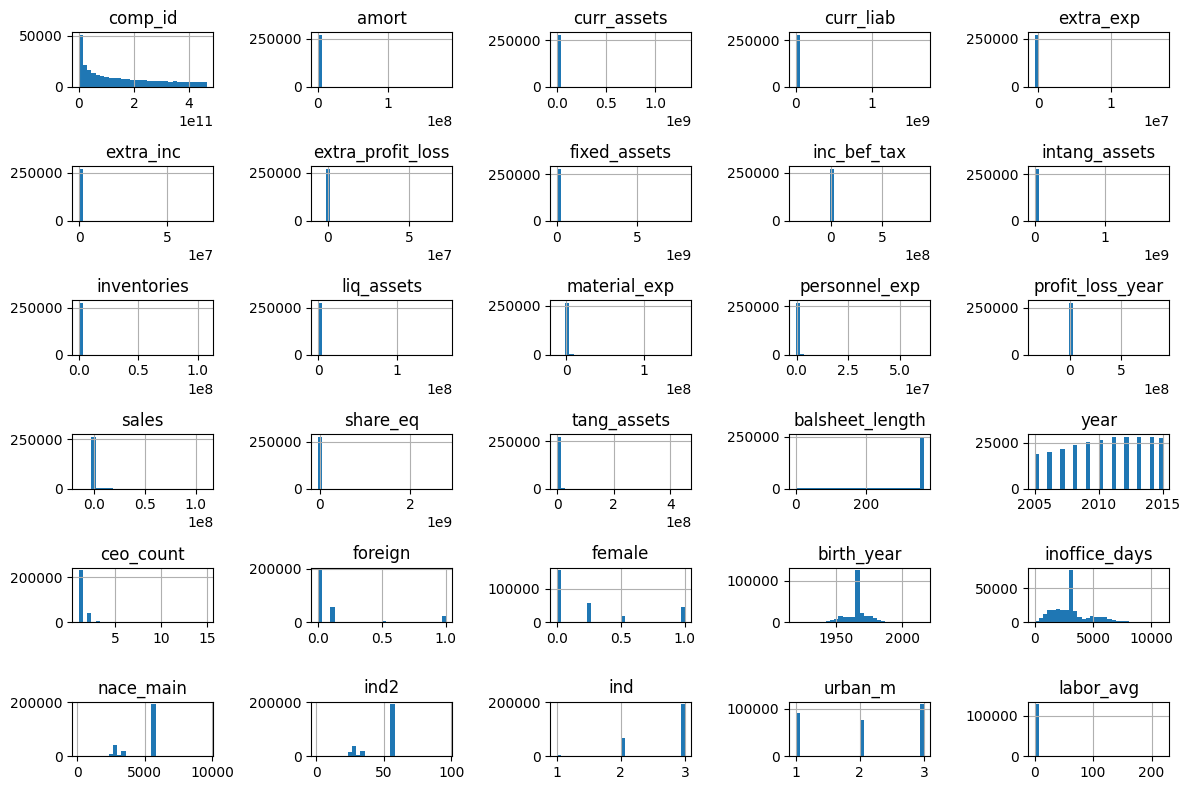

In [ ]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout(); plt.show()

### 2.3 Histogramas detalhados de variáveis-chave

Selecionamos algumas variáveis de interesse (`sales`, `birth_year`, `curr_assets`,`liq_assets`) para analisar mais de perto a distribuição. Isso permite:

- Avaliar melhor a presença de caudas longas ou concentração de valores;
- Justificar transformações aplicadas nas próximas etapas;
- Compreender melhor o comportamento de variáveis diretamente ligadas à receita ou ao tempo de operação da empresa.




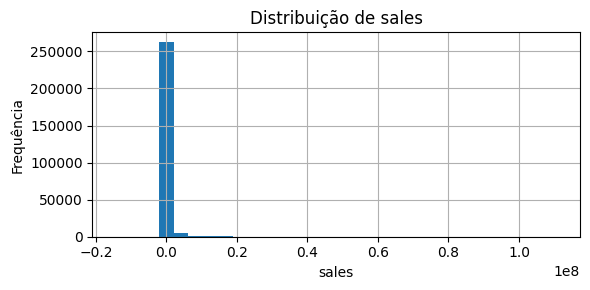

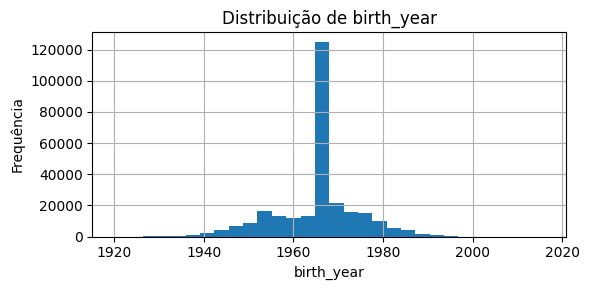

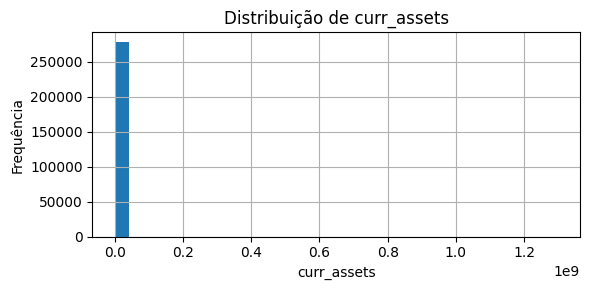

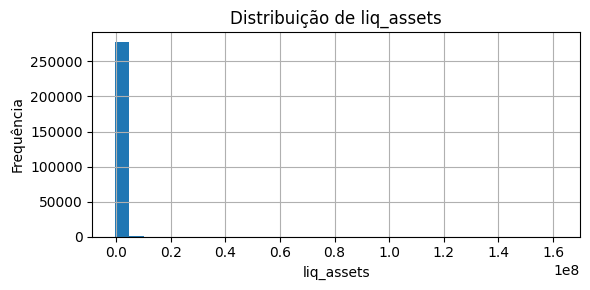

In [ ]:
# Escolher variáveis para olhar (ajustar conforme as disponíveis no dataset)
variaveis = ['sales', 'birth_year','curr_assets','liq_assets']

for col in variaveis:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        df[col].hist(bins=30)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

### 2.4 Checagem rápida de variáveis numéricas

Nesta etapa, selecionamos automaticamente todas as colunas numéricas do dataset para realizar uma verificação geral:

- **Estatísticas clássicas**: com `describe()` visualizamos *contagem*, *média*, *desvio padrão*, *mínimo*, *quartis* e *máximo* de cada variável numérica.  
- **Contagem de valores negativos**: verificamos, em cada coluna, quantos registros possuem valores abaixo de zero.  
   

Essa checagem rápida fornece uma visão geral de possíveis inconsistências em todas as variáveis numéricas.


In [ ]:
cols = df.select_dtypes(include="number").columns
df[cols].describe().T
(df[cols] < 0).sum()


,0
comp_id,0
amort,100
curr_assets,183
curr_liab,180
extra_exp,121
extra_inc,57
extra_profit_loss,17111
fixed_assets,32
inc_bef_tax,128089
intang_assets,22


### 2.5 Boxplots — Outliers e assimetrias

Usamos boxplots para avaliar distribuição e identificar valores extremos nas variáveis numéricas.

A presença de muitos outliers reforça a necessidade de transformações ou técnicas robustas na modelagem futura.


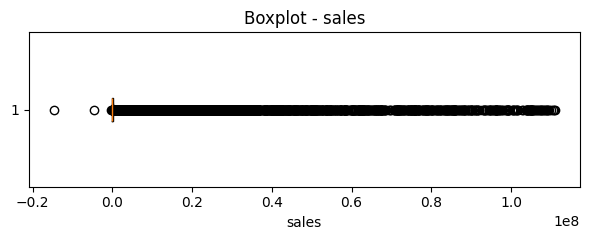

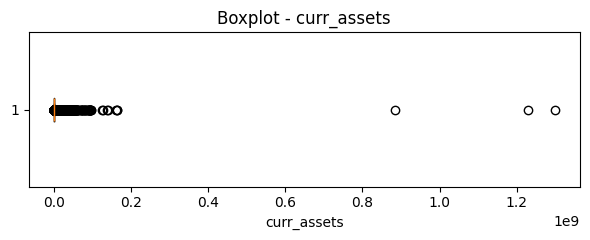

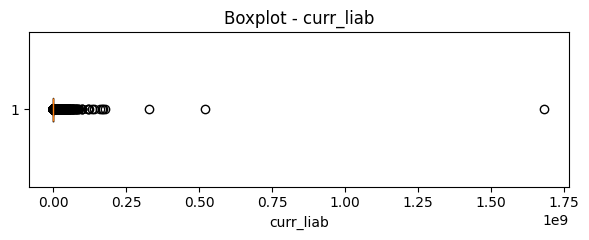

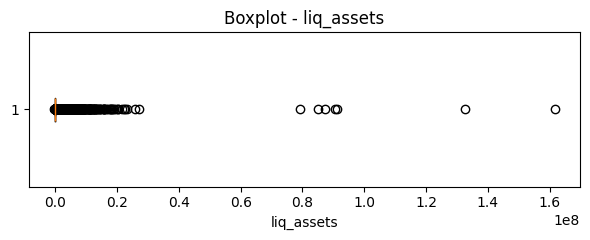

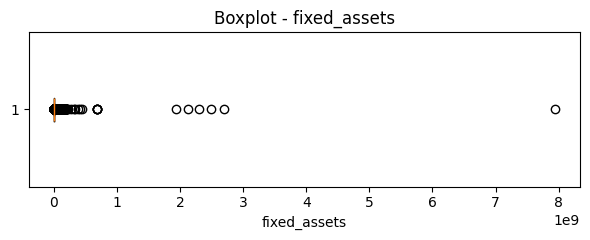

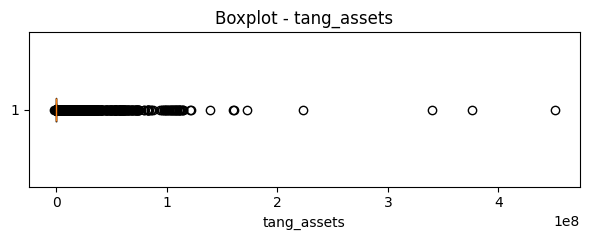

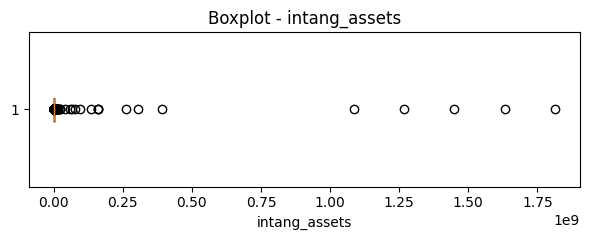

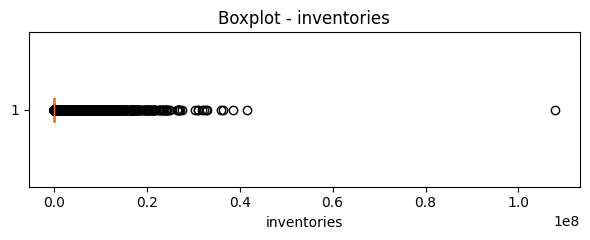

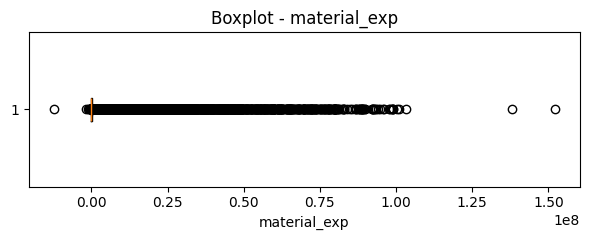

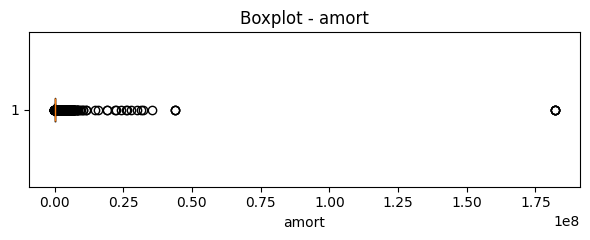

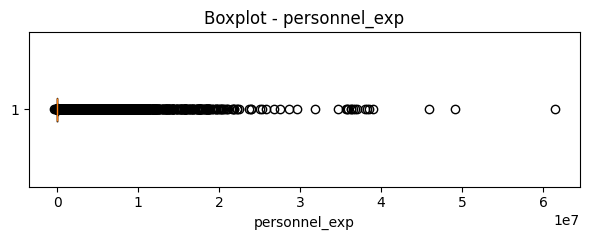

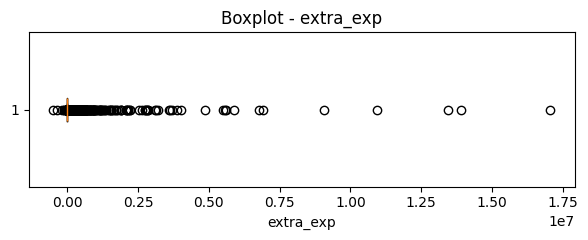

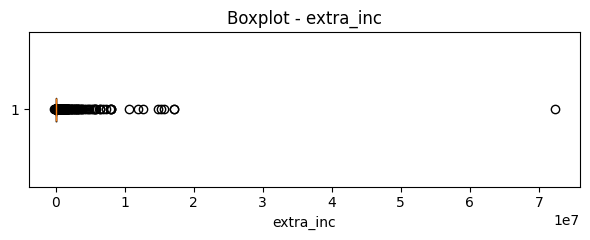

In [ ]:

for col in ["sales","curr_assets","curr_liab","liq_assets",
            "fixed_assets","tang_assets","intang_assets",
            "inventories","material_exp","amort","personnel_exp",
            "extra_exp","extra_inc"]:
    if col in df.columns:
        s = pd.to_numeric(df[col], errors="coerce").dropna()
        if len(s) < 5:
            print(f"[skip] {col}: poucos dados para boxplot")
            continue
        plt.figure(figsize=(6,2.5))
        plt.boxplot(s, vert=False, showfliers=True)
        plt.title(f"Boxplot - {col}")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


## 3. Exportar dataset tratado
Geramos um CSV com o estado da base **após** (i) remover colunas com muito missing e (ii) excluir 2016.  


O arquivo gerado documenta a saída do pipeline desta etapa e permite reprodutibilidade.

Esta base será usada como input para o recorte de 2012 e modelagem em R.


In [ ]:
out_path = "bisnode_parte1_limpa.csv"
df.to_csv(out_path, index=False)

print("Arquivo salvo com sucesso:", out_path)
print("Shape final (linhas, colunas):", df.shape)

# Checagem rápida de consistência: recarrega e confere shape
df_check = pd.read_csv(out_path)
assert df_check.shape == df.shape, "Arquivo salvo difere do dataframe em memória."
print("Verificação OK: shape no disco coincide com o em memória.")

Arquivo salvo com sucesso: bisnode_parte1_limpa.csv
Shape final (linhas, colunas): (278086, 35)
Verificação OK: shape no disco coincide com o em memória.


A etapa de pré-processamento em Python cumpriu seu papel de preparar a base Bisnode para as análises seguintes. Atendendo aos requisitos definidos (remoção de colunas com muitos valores ausentes, exclusão de 2016 e análises descritivas), foram incluídas visualizações adicionais (boxplots e matriz de correlação) e diagnósticos exploratórios (ex.: log de *sales*). Agora com um dataset limpo e pronto para continuidade de forma mais profunda ao decorrer desse projeto. Esta abordagem reforça a importância de um pré-processamento cuidadoso e fornece insumos valiosos para a equipe na criação das variáveis transformadas e do alvo na próxima fase do projeto.



## 4. Criação da Variável Alvo e Filtros

**Escopo desta seção:**  
1) Criação da variável dependente (empresa deixa de operar em X + 2 anos)
2) Filtro para apenas empresas em 2012
3) Garantir consistência nos dados (ex: Sales)
4) Colunas transformadas (variáveis assimétricas)

### 4.1 Adicionar uma coluna que represente o alvo (variável dependente) da predição

Considera-se que uma empresa deixou de operar quando ela apresenta atividade registrada em determinado ano *X*, mas não realiza nenhuma venda em *X+2*

In [ ]:
# Substituímos valores de Sales negativos ou ausentes por zero
df["sales"] = np.where(df["sales"] < 0, 0, df["sales"])
df["sales"] = df["sales"].fillna(0)

# Resumo em uma linha por empresa-ano -> maior valor de vendas (max)
fy = (
     df.groupby(["comp_id","year"])["sales"]
      .max()
      .reset_index(name="sales")
      .sort_values(["comp_id","year"])
)

# Transformação de valor numérico em booleano (True/False)
fy["has_sales"] = fy["sales"] > 0

# Construção de matriz Empresa x Ano
mat = fy.pivot(index="comp_id", columns="year", values="has_sales").sort_index(axis=1).fillna(False)

# Deslocamento da matriz para alinhar ano X com X+2 -> comparação direta
mat_plus2 = mat.shift(-2, axis=1)

# Matriz Churn
churn_mat = (mat == True) & (mat_plus2 == False)

# Retorno ao formato longo e criação da variável alvo
target_fy = churn_mat.stack(dropna=False).rename("churn_in_2y").reset_index()

#Anexo do objeto da predição
df = df.merge(target_fy, on=["comp_id","year"], how="left", validate="m:1")

df

/tmp/ipython-input-4155509612.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mat = fy.pivot(index="comp_id", columns="year", values="has_sales").sort_index(axis=1).fillna(False)
/tmp/ipython-input-4155509612.py:26: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  target_fy = churn_mat.stack(dropna=False).rename("churn_in_2y").reset_index()


,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,churn_in_2y
0,1.001034e+06,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,218.518524,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,False
1,1.001034e+06,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,996.296326,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,False
2,1.001034e+06,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,570.370361,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,False
3,1.001034e+06,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,714.814819,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN,False
4,1.001034e+06,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,-11044.444336,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278081,4.641209e+11,0.000000,1807.407349,3.703704,0.0,0.0,0.0,0.000000,25.925926,0.0,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,True
278082,4.641209e+11,0.000000,1518.518555,96.296295,0.0,0.0,0.0,0.000000,-381.481476,0.0,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,False
278083,4.641209e+11,0.000000,988.888916,77.777779,0.0,0.0,0.0,0.000000,-511.111115,0.0,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,False
278084,4.641209e+11,0.000000,644.444458,233.333328,0.0,0.0,0.0,0.000000,-500.000000,0.0,...,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN,False


### 4.2 Restringir a análise ao ano de 2012

Realizamos um filtro na base para selecionarmos apenas as informações do ano de 2012

In [ ]:
df_2012 = df[df["year"] == 2012].copy().reset_index(drop=True)
df_2012

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,churn_in_2y
0,1.001034e+06,140.740738,1.481481e+02,2.142963e+04,0.000000,0.0,0.000000,340.740753,-2474.073975,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,False
1,1.001541e+06,481.481476,9.629630e+03,1.303704e+03,0.000000,0.0,0.000000,190566.671875,-7696.296387,0.0,...,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN,False
2,1.002029e+06,14929.629883,2.038852e+05,1.204445e+05,0.000000,0.0,0.000000,23459.259766,11818.518555,0.0,...,Domestic,2711.0,27.0,2.0,3,East,2006-07-03,NaN,0.458333,False
3,1.003200e+06,25.925926,2.222222e+01,1.099630e+04,0.000000,0.0,0.000000,0.000000,-2337.037109,0.0,...,Domestic,5630.0,56.0,3.0,1,Central,2003-10-21,2014-08-09,NaN,True
4,1.007261e+06,0.000000,2.555556e+02,9.207407e+03,0.000000,0.0,0.000000,0.000000,-4670.370605,0.0,...,Domestic,5610.0,56.0,3.0,1,Central,2010-08-26,2015-11-19,0.083333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28464,4.639820e+11,16337.037109,3.140000e+04,8.300000e+03,0.000000,0.0,0.000000,113266.656250,-51051.851562,0.0,...,Domestic,2822.0,28.0,2.0,1,Central,1995-05-14,NaN,0.548611,False
28465,4.640212e+11,3566.666748,3.149630e+04,1.783704e+04,0.000000,0.0,0.000000,31707.408203,462.962952,0.0,...,Domestic,2822.0,28.0,2.0,2,Central,2006-05-09,NaN,0.083333,False
28466,4.640446e+11,76059.257812,4.776548e+06,1.297552e+06,0.000000,0.0,0.000000,286355.562500,944962.937500,0.0,...,Foreign,3312.0,33.0,2.0,3,Central,2008-10-09,NaN,1.840278,False
28467,4.641050e+11,1311.111084,3.261481e+04,1.104815e+04,22.222221,0.0,-22.222221,8125.925781,422.222229,0.0,...,Domestic,5610.0,56.0,3.0,3,West,1989-04-28,NaN,1.060606,False


### 4.3 Verificar inconsistências nos dados

Análise de colunas numéricas para identificar variáveis onde valores negativos não fazem sentido (ex: Sales).

In [ ]:
# Contagem de valores negativos em cada coluna
num_cols = df_2012.select_dtypes(include="number").columns
neg_counts = (df_2012[num_cols] < 0).sum()
neg_counts = neg_counts[neg_counts > 0].sort_values(ascending=False)
print("Contagem de valores negativos em cada coluna:")
print(neg_counts)

# Seleção de variáveis que não poderiam apresentar valores negativos
non_neg_cols = [
    "liq_assets", "curr_assets", "curr_liab", "material_exp",
    "amort", "personnel_exp", "extra_exp", "extra_inc",
    "inventories", "intang_assets", "tang_assets"
]

# Clip substitui valores negativos por zero
df_2012[non_neg_cols] = df_2012[non_neg_cols].clip(lower=0)

Contagem de valores negativos em cada coluna:
profit_loss_year     14632
inc_bef_tax          14587
share_eq             10941
extra_profit_loss     1469
liq_assets              63
curr_assets             25
curr_liab               17
material_exp            12
amort                    7
personnel_exp            6
extra_exp                5
extra_inc                4
inventories              4
intang_assets            2
tang_assets              1
dtype: Int64


### 4.4 Gerar colunas transformadas

Realizar a transformação de variáveis com distribuição bastante assimétrica, aplicando log

In [ ]:
#df["log1p_sales"] = np.log1p(df["sales"])   # = log(1 + sales)

# Cálculo do coeficiente de assimetria
print(df_2012[num_cols].skew())

# Colunas assimétricas
cols_log = ["sales","curr_assets","curr_liab","liq_assets",
            "fixed_assets","tang_assets","intang_assets",
            "inventories","material_exp","amort","personnel_exp",
            "extra_exp","extra_inc"
]

df_2012 = df_2012.assign(**{f"{c}_log1p": np.log1p(df_2012[c]) for c in cols_log if c in df_2012.columns})
df_2012

comp_id                0.657228
amort                 41.193706
curr_assets           25.927372
curr_liab             84.914909
extra_exp            135.631642
extra_inc             98.526592
extra_profit_loss    114.827356
fixed_assets          90.071681
inc_bef_tax           86.039187
intang_assets        164.481752
inventories           25.746851
liq_assets           101.365407
material_exp          18.958077
personnel_exp           27.7267
profit_loss_year       7.802792
sales                 18.020548
share_eq             118.239013
tang_assets           96.726982
balsheet_length        -3.63587
year                        0.0
ceo_count               3.14505
foreign                2.656236
female                 1.148452
birth_year            -0.250684
inoffice_days          1.114003
nace_main             -0.845104
ind2                  -0.849732
ind                   -1.444428
urban_m               -0.146652
labor_avg             18.385161
dtype: Float64


,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,...,liq_assets_log1p,fixed_assets_log1p,tang_assets_log1p,intang_assets_log1p,inventories_log1p,material_exp_log1p,amort_log1p,personnel_exp_log1p,extra_exp_log1p,extra_inc_log1p
0,1.001034e+06,140.740738,1.481481e+02,2.142963e+04,0.000000,0.0,0.000000,340.740753,-2474.073975,0.0,...,3.293090,5.834052,5.834052,0.0,0.000000,7.530460,4.954000,5.656639,0.00000,0.0
1,1.001541e+06,481.481476,9.629630e+03,1.303704e+03,0.000000,0.0,0.000000,190566.671875,-7696.296387,0.0,...,9.110426,12.157763,12.157763,0.0,0.000000,9.030358,6.178943,0.000000,0.00000,0.0
2,1.002029e+06,14929.629883,2.038852e+05,1.204445e+05,0.000000,0.0,0.000000,23459.259766,11818.518555,0.0,...,9.621044,10.063063,10.063063,0.0,6.520294,13.799657,9.611170,10.622255,0.00000,0.0
3,1.003200e+06,25.925926,2.222222e+01,1.099630e+04,0.000000,0.0,0.000000,0.000000,-2337.037109,0.0,...,3.145110,0.000000,0.000000,0.0,0.000000,7.567518,3.293090,7.212704,0.00000,0.0
4,1.007261e+06,0.000000,2.555556e+02,9.207407e+03,0.000000,0.0,0.000000,0.000000,-4670.370605,0.0,...,5.547345,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,8.449208,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28464,4.639820e+11,16337.037109,3.140000e+04,8.300000e+03,0.000000,0.0,0.000000,113266.656250,-51051.851562,0.0,...,8.737827,11.637509,11.637509,0.0,0.000000,11.995975,9.701251,10.967960,0.00000,0.0
28465,4.640212e+11,3566.666748,3.149630e+04,1.783704e+04,0.000000,0.0,0.000000,31707.408203,462.962952,0.0,...,7.049994,10.364337,10.364337,0.0,9.310109,10.338184,8.179667,7.901377,0.00000,0.0
28466,4.640446e+11,76059.257812,4.776548e+06,1.297552e+06,0.000000,0.0,0.000000,286355.562500,944962.937500,0.0,...,11.889007,12.564993,12.564993,0.0,13.589141,15.608867,11.239281,14.056303,0.00000,0.0
28467,4.641050e+11,1311.111084,3.261481e+04,1.104815e+04,22.222221,0.0,-22.222221,8125.925781,422.222229,0.0,...,9.611914,9.002938,9.002938,0.0,8.375177,11.476925,7.179393,11.068273,3.14511,0.0


## 5. *Feature Engineering* + Tratamento de Missing + Filtro de Receita

## O que vamos fazer (visão geral)

1. **Criar novas variáveis** que façam sentido para o problema — começando pela **idade da empresa**.  
2. **Tratar *missing values*** de forma explícita (quando imputar, quando recodificar, quando excluir).  
3. **Aplicar o filtro de receita** (entre **€1.000 e €10.000.000**) para manter um recorte coerente com o enunciado.  
4. **Documentar as escolhas** com estatísticas e gráficos rápidos (antes/depois), para que qualquer pessoa entenda o impacto.

### 5.1 Idade da empresa

Criamos a variável **`age_years`**, que representa quantos anos a empresa tinha no ano de referência do balanço (`year`).

- **Fonte:** `founded_date` (mais completa do que `founded_year`).  
- **Cálculo:** `year - founded_year`.  
- **Tratamentos aplicados:**
  - Se a idade calculada for **negativa**, ajustamos para **0** (erro de dado interpretado como “empresa recém-fundada”).  
  - Se o valor de `founded_date` estiver ausente, mantemos **NaN** para evitar imputação arbitrária.  
  - Criamos uma *flag* de outliers para idades acima de 200 anos, marcando esses casos para auditoria.  

Essa variável será útil para capturar a **maturidade da empresa como possível fator de risco de encerramento**
.

In [ ]:
# Garantir que founded_date está no formato datetime
df_2012["founded_date"] = pd.to_datetime(df_2012["founded_date"], errors="coerce")

# Criar coluna com ano de fundação (inteiro, aceitando NaN)
df_2012["founded_year"] = df_2012["founded_date"].dt.year.astype("Int64")

# Calcular idade da empresa
df_2012["age_years"] = df_2012["year"] - df_2012["founded_year"]

In [ ]:
# Corrigir casos inválidos:
# - idade negativa -> vira 0
# - falta founded_year -> permanece NaN automaticamente
df_2012["age_years"] = df_2012["age_years"].where(df_2012["age_years"] >= 0, 0)

# Garantir que continua como inteiro (com suporte a NaN)
df_2012["age_years"] = df_2012["age_years"].astype("Int64")

In [ ]:
# Checar resultado
df_2012[["comp_id", "year", "founded_date", "founded_year", "age_years"]].head(10)

,comp_id,year,founded_date,founded_year,age_years
0,1001034.0,2012,1990-11-19,1990,22
1,1001541.0,2012,2008-02-24,2008,4
2,1002029.0,2012,2006-07-03,2006,6
3,1003200.0,2012,2003-10-21,2003,9
4,1007261.0,2012,2010-08-26,2010,2
5,1011889.0,2012,1992-11-09,1992,20
6,1014183.0,2012,2001-12-21,2001,11
7,1018301.0,2012,2004-06-29,2004,8
8,1022796.0,2012,2001-02-01,2001,11
9,1035705.0,2012,2011-10-26,2011,1


In [ ]:
# Checar estatísticas descritivas
df_2012["age_years"].describe()

,age_years
count,28469.0
mean,8.437107
std,6.980595
min,0.0
25%,2.0
50%,7.0
75%,14.0
max,63.0


### 5.2 Ajuste do tipo da variável `age_years`

A idade foi inicialmente calculada como `float` porque usamos `np.where`, que devolve `NaN` em float.  
Como **idade é naturalmente uma variável inteira**, convertemos para o tipo **`Int64` do pandas**, que permite guardar valores nulos (`NaN`) sem forçar a conversão para float.

Isso garante que:
- Empresas com idade conhecida tenham valores inteiros (anos completos).  
- Empresas sem data de fundação continuem registradas como `NaN`, preservando a informação de ausência.


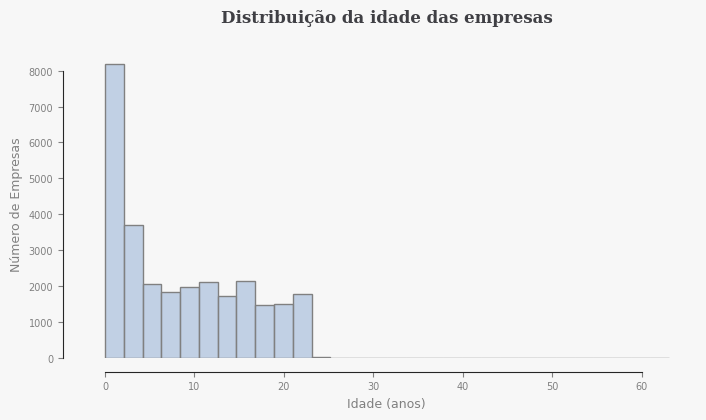

In [ ]:
# Definir estilo
sns.set_style('ticks', {
    'axes.facecolor': '#f7f7f7',
    'figure.facecolor': '#f7f7f7'
})

# --- HISTOGRAMA ---
plt.figure(figsize=(8,4))
ax = sns.histplot(
    x="age_years",
    data=df_2012,
    bins=30,
    color="lightsteelblue",
    edgecolor="gray"
)

plt.title('Distribuição da idade das empresas',
          fontsize=12,
          fontweight='bold',
          family='serif',
          color='#3f3f44',
          pad=20)

plt.xlabel('Idade (anos)', fontsize=9, color='gray')
plt.ylabel('Número de Empresas', fontsize=9, color='gray')

ax.tick_params(colors='gray', labelsize=7)
sns.despine(offset=10, trim=True)
plt.show()

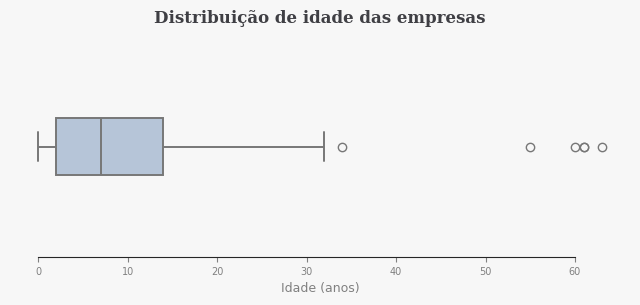

In [ ]:
# --- BOXPLOT ---
plt.figure(figsize=(8,2.5))
ax = sns.boxplot(
    x="age_years",
    data=df_2012,
    linewidth=1.4,
    color="lightsteelblue",
    width=0.3
)

plt.title('Distribuição de idade das empresas',
          fontsize=12,
          fontweight='bold',
          family='serif',
          color='#3f3f44',
          pad=20)

plt.xlabel('Idade (anos)', fontsize=9, color='gray')

ax.tick_params(colors='gray', labelsize=7)
sns.despine(offset=10, trim=True)
plt.show()

In [ ]:
df_2012.head(5).T

,0,1,2,3,4
comp_id,1001034.0,1001541.0,1002029.0,1003200.0,1007261.0
amort,140.740738,481.481476,14929.629883,25.925926,0.0
curr_assets,148.148148,9629.629883,203885.1875,22.222221,255.555557
curr_liab,21429.628906,1303.703735,120444.453125,10996.295898,9207.407227
extra_exp,0.0,0.0,0.0,0.0,0.0
extra_inc,0.0,0.0,0.0,0.0,0.0
extra_profit_loss,0.0,0.0,0.0,0.0,0.0
fixed_assets,340.740753,190566.671875,23459.259766,0.0,0.0
inc_bef_tax,-2474.073975,-7696.296387,11818.518555,-2337.037109,-4670.370605
intang_assets,0.0,0.0,0.0,0.0,0.0


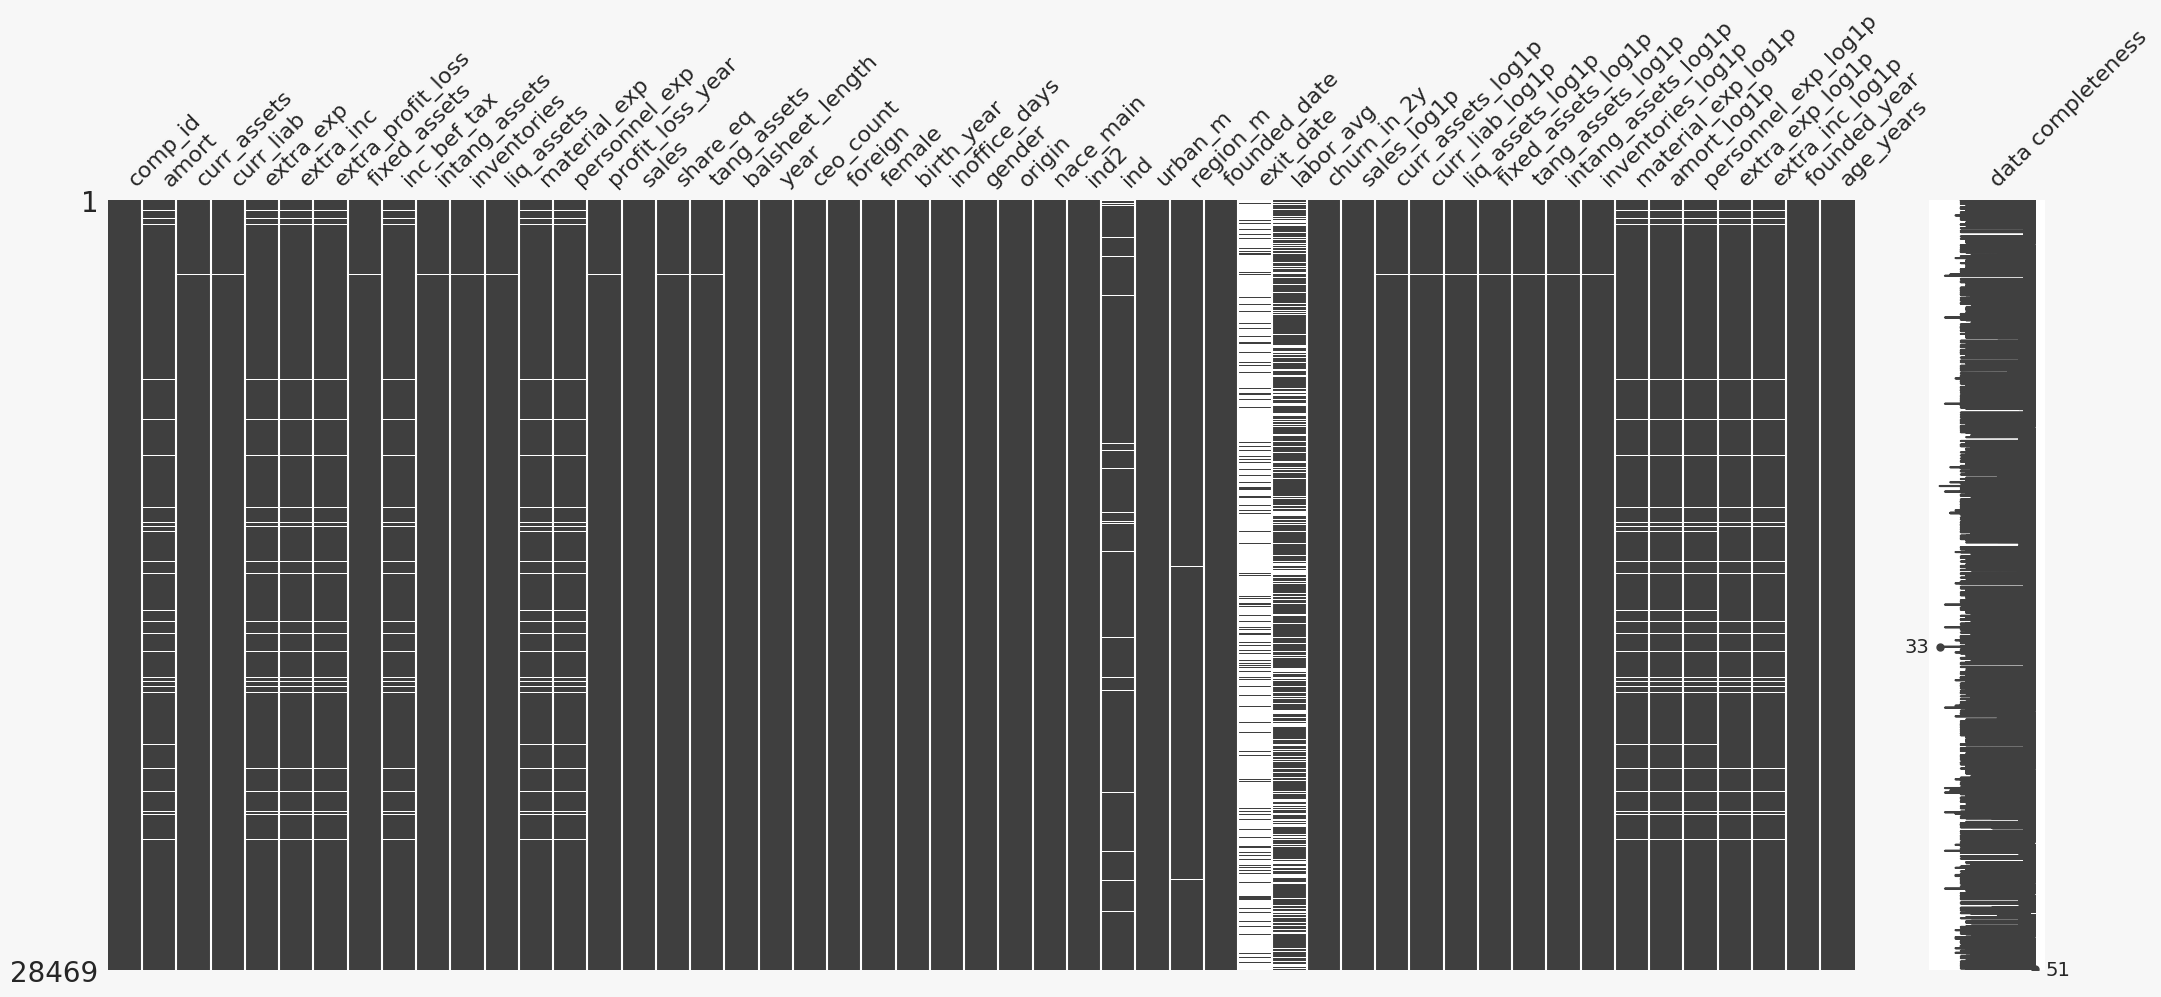

In [ ]:
msno.matrix(df_2012, labels = True)  # força a exibir labels
plt.show()

### 5.3 Cálculo de Receita

Para cálculo da receita, seguiremos como foi apontado nas instruções do estudo, onde `revenue = sales`.


In [ ]:
# Criar coluna de revenue (sales puro)
df_2012["revenue"] = df_2012["sales"]

# Transformação log1p: log(1 + revenue)
df_2012["revenue_log1p"] = np.log1p(df_2012["revenue"])

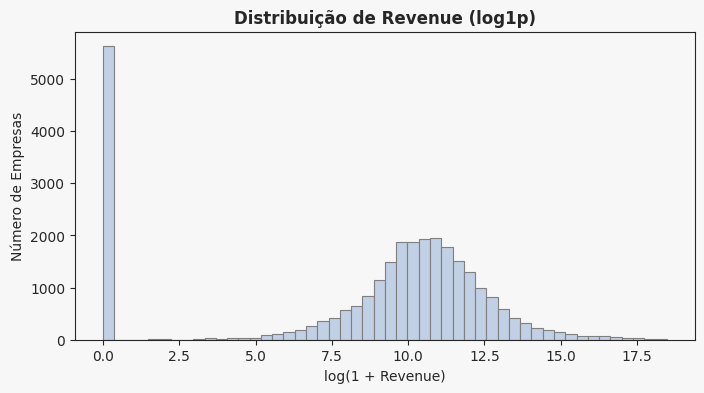

In [ ]:
# Estilo
sns.set_style('ticks', {
    'axes.facecolor': '#f7f7f7',
    'figure.facecolor': '#f7f7f7'
})

# Histograma
plt.figure(figsize=(8,4))
sns.histplot(df_2012["revenue_log1p"].dropna(), bins=50, color="lightsteelblue", edgecolor="gray")
plt.title("Distribuição de Revenue (log1p)", fontsize=12, fontweight="bold")
plt.xlabel("log(1 + Revenue)")
plt.ylabel("Número de Empresas")
plt.show()

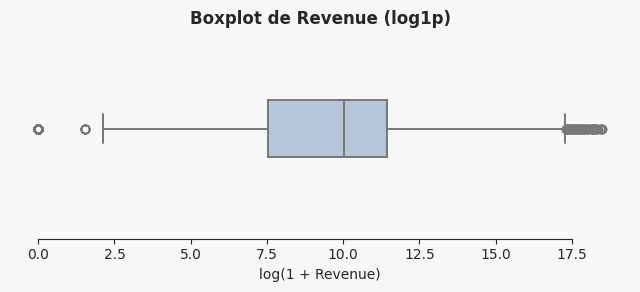

In [ ]:
# Boxplot
plt.figure(figsize=(8,2.5))
sns.boxplot(x=df_2012["revenue_log1p"], color="lightsteelblue", linewidth=1.4, width=0.3)
plt.title("Boxplot de Revenue (log1p)", fontsize=12, fontweight="bold")
plt.xlabel("log(1 + Revenue)")
sns.despine(offset=10, trim=True)
plt.show()

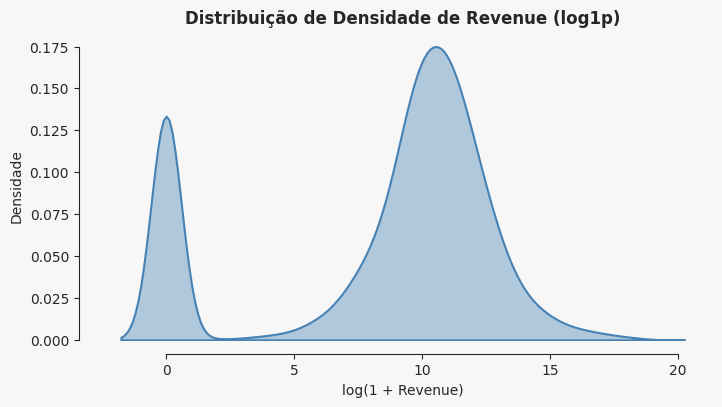

In [ ]:
# KDE
plt.figure(figsize=(8,4))
sns.kdeplot(df_2012["revenue_log1p"].dropna(), fill=True, alpha=0.4, color="steelblue", linewidth=1.5)
plt.title("Distribuição de Densidade de Revenue (log1p)", fontsize=12, fontweight="bold")
plt.xlabel("log(1 + Revenue)")
plt.ylabel("Densidade")
sns.despine(offset=10, trim=True)

plt.show()

Com a análise, verificamos:

1. Muitas empresas com revenue = 0 (o pico no log(1+Revenue) próximo de 0).
2. Uma distribuição concentrada no meio (entre ~8 e 12 no log), que corresponde a receitas entre aproximadamente €3.000 e €160.000.

**Isso confirma a necessidade de aplicar o filtro €1.000 – €10.000.000, porque:**

1. elimina empresas sem receita (0 ou muito próximas de 0),
2. remove outliers absurdos (receitas muito altas que distorcem a escala).

### 5.4 Filtro de Receita (€1.000 – €10.000.000)

De acordo com o enunciado do projeto, aplicamos um filtro para manter apenas empresas com receita entre **€1.000 e €10.000.000**.  

### O que fizemos
- Criamos a variável `revenue` a partir de `sales`.  
- Calculamos `revenue_log1p = log(1 + revenue)` para reduzir a assimetria.  
- Aplicamos o filtro: `1.000 ≤ revenue ≤ 10.000.000`.

### Por que fizemos
- Empresas com receita igual a **0** ou muito próximas de 0 não são representativas para análise de continuidade.  
- Valores extremos de receita (acima de €10M) distorcem a escala e poderiam enviesar o modelo.  
- O intervalo definido pelo professor assegura um conjunto de dados mais consistente e comparável.

### Efeito observado
- **Antes do filtro:** 28.469 empresas  
- **Depois do filtro:** 21.723 empresas  
- **Removidas:** 6.746 empresas (**23,7%**)  

O filtro eliminou principalmente:
- empresas sem receita (`revenue = 0`),  
- empresas com receita fora da faixa realista definida (acima de €10M).  

O resultado é um conjunto de dados mais **limpo, estável e alinhado** com a proposta do modelo preditivo.

Antes do filtro: 28469
Depois do filtro: 21723


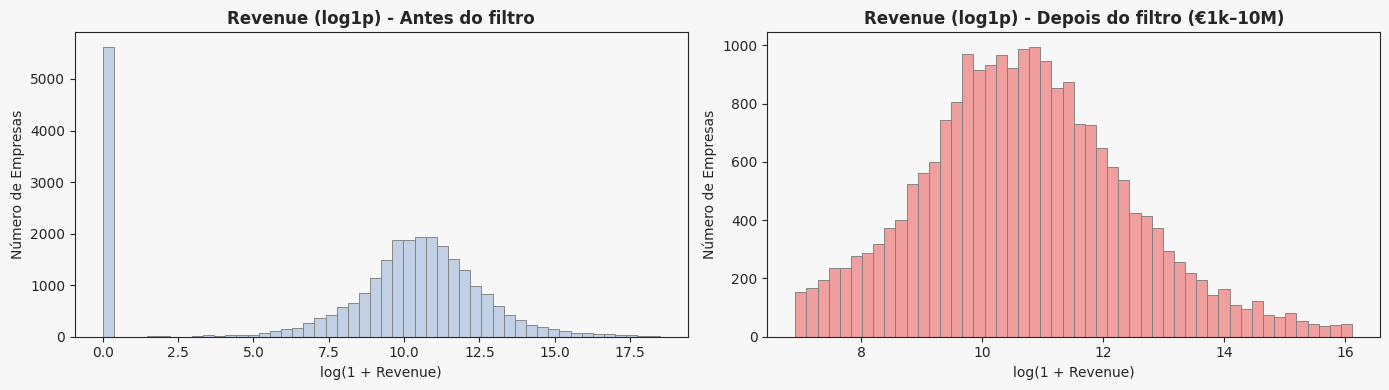

In [ ]:
# Definir limites do filtro
low, high = 1_000, 10_000_000

# Criar máscara e aplicar filtro
mask = df_2012["revenue"].between(low, high, inclusive="both")
df_2012_filtered = df_2012[mask].copy()

print("Antes do filtro:", df_2012.shape[0])
print("Depois do filtro:", df_2012_filtered.shape[0])

# Plot comparativo
fig, axes = plt.subplots(1, 2, figsize=(14,4))

# Antes
sns.histplot(df_2012["revenue_log1p"].dropna(), bins=50, color="lightsteelblue", edgecolor="gray", ax=axes[0])
axes[0].set_title("Revenue (log1p) - Antes do filtro", fontsize=12, fontweight="bold")
axes[0].set_xlabel("log(1 + Revenue)")
axes[0].set_ylabel("Número de Empresas")

# Depois
sns.histplot(df_2012_filtered["revenue_log1p"].dropna(), bins=50, color="lightcoral", edgecolor="gray", ax=axes[1])
axes[1].set_title("Revenue (log1p) - Depois do filtro (€1k–10M)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("log(1 + Revenue)")
axes[1].set_ylabel("Número de Empresas")

plt.tight_layout()
plt.show()


In [ ]:
# Contagem antes e depois do filtro
n_before = df_2012.shape[0]
n_after = df_2012_filtered.shape[0]

# Redução em números absolutos e percentual
removed = n_before - n_after
pct_removed = removed / n_before * 100

print(f"Empresas antes do filtro: {n_before:,}")
print(f"Empresas depois do filtro: {n_after:,}")
print(f"Removidas: {removed:,} ({pct_removed:.2f}%)")


Empresas antes do filtro: 28,469
Empresas depois do filtro: 21,723
Removidas: 6,746 (23.70%)


### 5.5 Tratamento de Missing Values

Nesta subetapa, tratamos ausências de dados de forma **explícita** e **justificável**, sempre priorizando transparência (com *flags*) e estabilidade para o modelo.

Esse tratamento garante que o dataset final não tenha lacunas, mas sem perder a informação sobre a ausência original (quando ela pode ser relevante).

In [ ]:
# Resumo de missing values no dataset filtrado
missing_summary = (
    df_2012_filtered.isna()
    .mean()
    .sort_values(ascending=False) * 100
).reset_index()

missing_summary.columns = ["variavel", "pct_missing"]

# Mostrar apenas variáveis que têm missing > 0%
missing_summary = missing_summary[missing_summary["pct_missing"] > 0]

# Exibir top 20 para começar
missing_summary.head(20)


,variavel,pct_missing
0,exit_date,89.066888
1,labor_avg,14.519173
2,ind,3.019841
3,region_m,0.271602
4,amort,0.184137
5,personnel_exp,0.184137
6,material_exp_log1p,0.184137
7,personnel_exp_log1p,0.184137
8,amort_log1p,0.184137
9,material_exp,0.184137


In [ ]:
# função simples pra resumir % de missing (pós-tratamento)
def resumo_missing(df, top=20):
    ms = (df.isna().mean().sort_values(ascending=False) * 100).reset_index()
    ms.columns = ["variavel","pct_missing"]
    return ms[ms["pct_missing"] > 0].head(top)

# Vamos trabalhar diretamente no df_2012_filtered
df = df_2012_filtered

#### 1) `exit_date` — **não imputamos**
- **O que fizemos:** mantivemos `NaN`.
- **Por quê:** em 2012, a maior parte das empresas ainda estava ativa; ausência de `exit_date` é **informativa** (não indica erro).
- **Efeito:** preservamos o sinal “empresa ativa” sem criar valores artificiais.


#### 2) `labor_avg` (~14,5% missing) — **flag + mediana**
- **O que fizemos:** criamos `labor_avg_missing` (0/1) e imputamos `labor_avg` pela **mediana**.
- **Por quê:** magnitude comparável entre empresas e robustez a outliers; a *flag* permite ao modelo “saber” que o dado faltou.
- **Efeito:** reduzimos lacunas sem distorcer a distribuição; a *flag* mantém a informação de ausência.


In [ ]:
if "labor_avg" in df.columns:
    df["labor_avg_missing"] = df["labor_avg"].isna().astype(int)
    med_labor = df["labor_avg"].median(skipna=True)
    df["labor_avg"] = df["labor_avg"].fillna(med_labor)

#### 3) `ind` (~3,0%) e `region_m` (0,27%) — **categorias: “Missing”; numéricas: flag + mediana**

- **O que fizemos:**  
  - Se **categóricas** (`object`): `fillna("Missing")`.  
  - Se **numéricas**: criamos *flag* `<col>_missing` e imputamos por **mediana**.
- **Por quê:** preservar a distinção “valor ausente” nas categorias; para numéricas, mediana é estável e a *flag* retém a informação.
- **Efeito:** evitamos perda de linhas e mantemos a interpretabilidade.

In [ ]:
for col in ["ind", "region_m"]:
    if col in df.columns:
        if pd.api.types.is_object_dtype(df[col]):
            df[col] = df[col].fillna("Missing")
        else:
            # numérico: flag + mediana
            df[f"{col}_missing"] = df[col].isna().astype(int)
            med_val = df[col].median(skipna=True)
            df[col] = df[col].fillna(med_val)

#### 4) Variáveis financeiras com *missing* residual (<0,2%) — **0 (zero técnico)**
- **O que fizemos:** imputamos **0** em colunas com ausência **residual** (ex.: `amort`, `material_exp`, `personnel_exp`, `tang_assets`, `liq_assets`, `inventories`, `profit_loss_year`, `share_eq`, `intang_assets`).
- **Por quê:** o volume de *missing* é muito baixo; zero mantém consistência operacional e simplifica o pipeline.
- **Efeito:** elimina lacunas residuais sem impacto material na distribuição global.

In [ ]:
pequenos_missing_num = [
    "amort", "material_exp", "personnel_exp",
    "tang_assets", "liq_assets", "inventories",
    "profit_loss_year", "share_eq", "intang_assets",
    # se quiser incluir outras de base:
    # "fixed_assets", "curr_assets", "curr_liab"
]

for col in pequenos_missing_num:
    if col in df.columns:
        df[col] = df[col].fillna(0)

#### 5) Recalcular variáveis transformadas em log
- **O que fizemos:** após imputações, recalculamos `*_log1p` (ex.: `labor_avg_log1p`, `amort_log1p`, …) para **evitar NaN** nas versões transformadas.
- **Por quê:** garantir coerência entre a coluna base e sua transformação.
- **Efeito:** as variáveis em log ficam utilizáveis no EDA e na modelagem.

In [ ]:
def ensure_log1p(df, base_col):
    log_col = f"{base_col}_log1p"
    if base_col in df.columns:
        df[log_col] = np.log1p(df[base_col])

# Recalcular para as que tratamos acima
for col in ["amort","material_exp","personnel_exp",
            "tang_assets","liq_assets","inventories",
            "profit_loss_year","share_eq","intang_assets",
            "labor_avg"]:
    ensure_log1p(df, col)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Resumo quantitativo (após tratamento)


- **Top variáveis com *missing* remanescente:**  


In [ ]:
print("Missing após tratamento (top 20):")
display(resumo_missing(df, top=20))

# checando especificamente as que tratamos
cols_check = ["exit_date","labor_avg","ind","region_m",
              "amort","material_exp","personnel_exp",
              "tang_assets","liq_assets","inventories",
              "profit_loss_year","share_eq","intang_assets"]
print("\n% missing (selecionadas):")
disp = (df[cols_check]
        .isna().mean().mul(100)
        .sort_values(ascending=False)
        .to_frame("%_missing"))
display(disp)

Missing após tratamento (top 20):


,variavel,pct_missing
0,exit_date,89.066888
1,profit_loss_year_log1p,46.153846
2,share_eq_log1p,37.255444
3,fixed_assets,0.046034
4,curr_assets_log1p,0.046034
5,curr_liab_log1p,0.046034
6,fixed_assets_log1p,0.046034
7,curr_assets,0.046034
8,curr_liab,0.046034
9,ind2,0.023017



% missing (selecionadas):


,%_missing
exit_date,89.066888
labor_avg,0.000000
ind,0.000000
region_m,0.000000
amort,0.000000
material_exp,0.000000
personnel_exp,0.000000
tang_assets,0.000000
liq_assets,0.000000
inventories,0.000000


- **Observações:**  
  - `exit_date` permanece majoritariamente ausente por ser **informação de negócio**, não erro.  
  - As demais variáveis-chave agora têm **0%** de *missing*.

#### Notas de modelagem
- Colunas com *flags* de imputação (ex.: `labor_avg_missing`) serão mantidas no treino para que o classificador capture efeitos da ausência.  
- Mantivemos decisões **mínimas e rastreáveis** (0/mediana/“Missing”), evitando imputações complexas sem necessidade.

### 5.6 Análise da Variável Alvo — `churn_in_2y`

Essa variável indica se a empresa **encerrou suas atividades nos dois anos seguintes** ao ano de referência (2012).

### O que observamos
- **Distribuição absoluta:**  
  - `0` = empresa continua ativa  
  - `1` = empresa fecha em até 2 anos  

- **Proporção:**  
  (X% continuam, Y% fecham — substituir pelos valores calculados)

### Por que isso é importante
- Se houver **desbalanceamento** (ex.: muito mais empresas que continuam do que fecham), o modelo pode tender a prever sempre a classe majoritária.  
- Isso orienta a escolha de métricas de avaliação (ex.: **AUC, F1-score, recall**) e, se necessário, técnicas de balanceamento de dados (undersampling, oversampling, SMOTE).


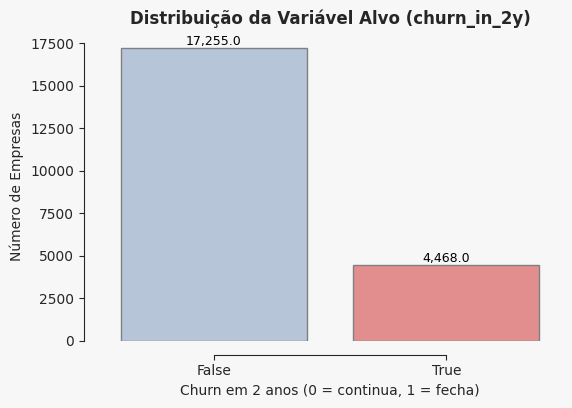

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(
    x="churn_in_2y",
    data=df_2012_filtered,
    hue="churn_in_2y",       # usar hue = mesma variável
    palette=["lightsteelblue","lightcoral"],
    legend=False,            # sem legenda redundante
    edgecolor="gray"
)

plt.title("Distribuição da Variável Alvo (churn_in_2y)",
          fontsize=12, fontweight="bold")

plt.xlabel("Churn em 2 anos (0 = continua, 1 = fecha)")
plt.ylabel("Número de Empresas")

# Mostrar valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black")

sns.despine(offset=10, trim=True)
plt.show()


## 6. Receita e Idade das empresas em relação ao Churn

Após o tratamento dos dados, exploramos como a **receita** e a **idade da empresa** se relacionam com a variável alvo `churn_in_2y`.

### Receita (`revenue_log1p`)
- Empresas que **continuaram ativas** apresentam **receita mediana mais alta**.
- Empresas que **fecharam** concentram-se em receitas menores, com cauda mais curta.
- Há outliers em ambos os grupos, mas os valores mais extremos de receita (empresas muito grandes) aparecem quase exclusivamente entre as empresas que se mantiveram.

Empresas com maior porte econômico tendem a ter mais resiliência e menor risco de fechamento.

---

### Idade (`age_years`)
- Empresas que **fecharam** são, em geral, **mais jovens** do que as que continuaram.
- A mediana de idade é claramente mais baixa entre as fechadas.
- Algumas empresas antigas também encerram suas atividades, mas esses casos são outliers.

A juventude da empresa está associada a maior risco de fechamento, reforçando a ideia de que os primeiros anos são críticos para a sobrevivência.

---

### Conclusão
Tanto a **idade** quanto a **receita** são variáveis importantes para explicar a probabilidade de churn:
- **Baixa idade** e **baixa receita** → maior risco de fechamento.  
- **Maior idade** e **maior receita** → maior estabilidade e menor risco.  

Esses padrões reforçam que essas variáveis devem ser levadas para a etapa de **modelagem preditiva** como preditores centrais.


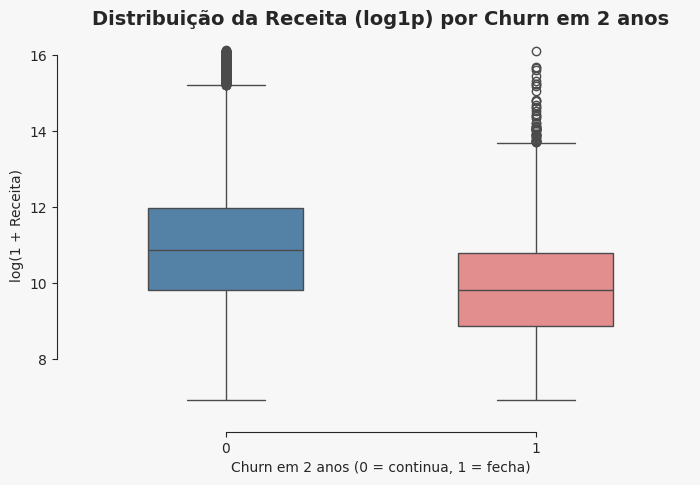

In [ ]:
df_2012_filtered["churn_in_2y_int"] = df_2012_filtered["churn_in_2y"].astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_2012_filtered,
    x="churn_in_2y_int",
    y="revenue_log1p",
    hue="churn_in_2y_int",   # 🔹 precisa do hue pra usar palette
    palette={0: "steelblue", 1: "lightcoral"},
    legend=False,
    width=0.5
)

plt.title("Distribuição da Receita (log1p) por Churn em 2 anos", fontsize=14, fontweight="bold")
plt.xlabel("Churn em 2 anos (0 = continua, 1 = fecha)")
plt.ylabel("log(1 + Receita)")
sns.despine(offset=10, trim=True)
plt.show()


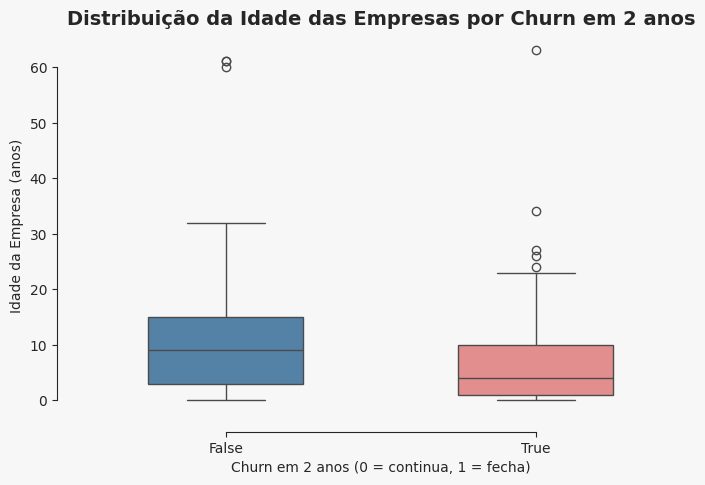

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df_2012_filtered,
    x="churn_in_2y",
    y="age_years",
    hue="churn_in_2y",
    palette={False: "steelblue", True: "lightcoral"},
    legend=False,
    width=0.5
)

plt.title("Distribuição da Idade das Empresas por Churn em 2 anos", fontsize=14, fontweight="bold")
plt.xlabel("Churn em 2 anos (0 = continua, 1 = fecha)")
plt.ylabel("Idade da Empresa (anos)")
sns.despine(offset=10, trim=True)
plt.show()


## Dataset Final para Modelagem (R)




- Dimensão e Colunas Finais:

In [ ]:
# Dimensão final
print("Shape final:", df_2012_filtered.shape)

# Nomes das colunas
print("\nColunas do dataset final:")
print(df_2012_filtered.columns.tolist())


Shape final: (21723, 59)

Colunas do dataset final:
['comp_id', 'amort', 'curr_assets', 'curr_liab', 'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets', 'material_exp', 'personnel_exp', 'profit_loss_year', 'sales', 'share_eq', 'tang_assets', 'balsheet_length', 'year', 'ceo_count', 'foreign', 'female', 'birth_year', 'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind', 'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg', 'churn_in_2y', 'sales_log1p', 'curr_assets_log1p', 'curr_liab_log1p', 'liq_assets_log1p', 'fixed_assets_log1p', 'tang_assets_log1p', 'intang_assets_log1p', 'inventories_log1p', 'material_exp_log1p', 'amort_log1p', 'personnel_exp_log1p', 'extra_exp_log1p', 'extra_inc_log1p', 'founded_year', 'age_years', 'revenue', 'revenue_log1p', 'labor_avg_missing', 'ind_missing', 'profit_loss_year_log1p', 'share_eq_log1p', 'labor_avg_log1p', 'churn_in_2y_int']




- Proporção de Empresas que fecharam em 2 anos:*   Item da lista



In [ ]:
df_2012_filtered["churn_in_2y"].value_counts(normalize=True) * 100


,proportion
churn_in_2y,
False,79.431938
True,20.568062


- Descrição das variáveis idade da empresa (`age_years`), receita (`revenue`) e log da receita (`revenue_log1p`), mostrando a tratativa feita na variável.

In [ ]:
df_2012_filtered[["age_years", "revenue", "revenue_log1p"]].describe()


,age_years,revenue,revenue_log1p
count,21723.0,2.172300e+04,21723.000000
mean,8.699305,2.309033e+05,10.711160
std,7.01942,7.720574e+05,1.710903
min,0.0,1.000000e+03,6.908755
25%,2.0,1.433148e+04,9.570284
50%,7.0,4.176296e+04,10.639789
75%,15.0,1.301685e+05,11.776593
max,63.0,9.989311e+06,16.117026


- Flags criadas para sinalizar variáveis com observações *missing* e foram ajustadas


In [ ]:
flag_cols = [col for col in df_2012_filtered.columns if col.endswith("_missing")]
df_2012_filtered[flag_cols].sum()


,0
labor_avg_missing,3154
ind_missing,656


- Ajuste de veriáveis categóricas que possuem categorias *missing*

In [ ]:
cat_fill_missing = ["ind2", "nace_main", "region_m", "origin", "gender", "ind"]
for col in cat_fill_missing:
    if col in df_2012_filtered.columns:
        if pd.api.types.is_object_dtype(df_2012_filtered[col]) or str(df_2012_filtered[col].dtype) == "category":
            df_2012_filtered[col] = df_2012_filtered[col].fillna("Missing")

- Selecionando as variáveis que serão mantidas na base para modelagem

In [ ]:
features_final = [
    # Demográficas / categóricas
    "age_years", "region_m", "ind", "ind2", "nace_main", "urban_m",
    "foreign", "female", "ceo_count", "origin", "gender",

    # Financeiras em log (apenas versões transformadas)
    "sales_log1p", "curr_assets_log1p", "curr_liab_log1p", "liq_assets_log1p",
    "fixed_assets_log1p", "tang_assets_log1p", "intang_assets_log1p",
    "inventories_log1p", "material_exp_log1p", "amort_log1p",
    "personnel_exp_log1p", "extra_exp_log1p", "extra_inc_log1p",
    "labor_avg_log1p",

    # Flags de imputação informativas
    "labor_avg_missing", "ind_missing",

    # Alvo binário (0/1)
    "churn_in_2y_int",
]

df_model = df_2012_filtered[features_final].copy()

- Garantindo que as variáveis numéricas não terão nenhum NaN

In [ ]:
num_cols = df_model.select_dtypes(include=["number", "Int64", "float64", "int64", "bool"]).columns.tolist()
num_cols = [c for c in num_cols if c != "churn_in_2y_int"]

for col in num_cols:
    if df_model[col].isna().any():
        med = df_model[col].median(skipna=True)
        df_model[col] = df_model[col].fillna(med)

# Se age_years for Int64 com NaN preenchido acima, converter para int64
if "age_years" in df_model.columns:
    if df_model["age_years"].isna().sum() == 0:
        df_model["age_years"] = df_model["age_years"].astype(int)

# Garantir alvo como int (0/1)
df_model["churn_in_2y_int"] = df_model["churn_in_2y_int"].astype(int)

- Validações Finais

In [ ]:
print("Shape do dataset FINAL para modelagem:", df_model.shape)
print("\n% missing por coluna (top 10):")
print((df_model.isna().mean().mul(100)).sort_values(ascending=False).head(10))

Shape do dataset FINAL para modelagem: (21723, 28)

% missing por coluna (top 10):
age_years    0.0
region_m     0.0
ind          0.0
ind2         0.0
nace_main    0.0
urban_m      0.0
foreign      0.0
female       0.0
ceo_count    0.0
origin       0.0
dtype: float64


**Versão entregue:** `dataset_modelagem_final.csv`

In [ ]:
df_model.to_csv("dataset_modelagem_final.csv", index=False)

**Critérios:**
- Mantivemos apenas **variáveis estáveis e informativas**, evitando colunas com alto *missing* (ex.: `profit_loss_year_log1p`, `share_eq_log1p` foram excluídas).
- Usamos **versões transformadas em log (`*_log1p`)** para variáveis financeiras (distribuições mais estáveis).
- Preenchemos *missings* residuais em **numéricas** com **mediana** e mantivemos **flags** relevantes (ex.: `labor_avg_missing`).
- Variáveis categóricas com raros *missings* foram padronizadas com a categoria `"Missing"`.

**Pronto para:**
- *Split* treino/teste no R;
- *One-hot encoding* das categóricas (`region_m`, `ind`, `ind2`, `nace_main`, `origin`, `gender`);
- Modelagem com métricas adequadas ao desbalanceamento (F1, AUC, Recall).

> Em resumo: dataset limpo, enxuto e rastreável — focado em **idade, porte (finanças) e setor**, que mostraram relação forte com o churn.